In [54]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [55]:
import numpy as np
import pandas as pd
import datetime as dt
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [40]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [42]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

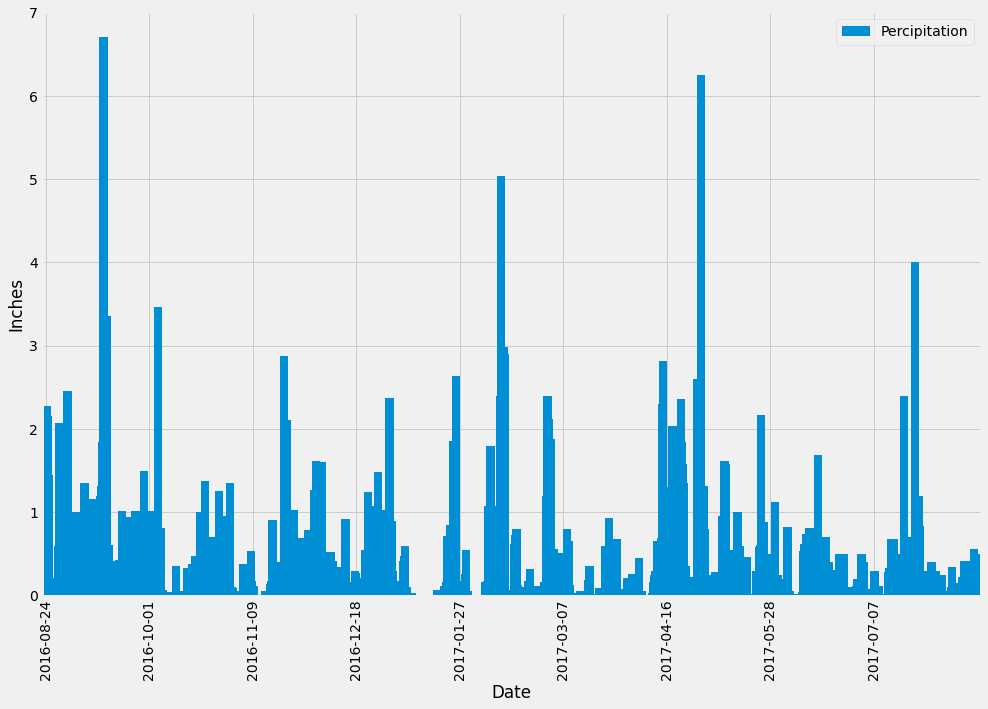

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

most_recent_date_dt = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.

first_date = most_recent_date_dt - dt.timedelta(days=365)
first_date_dt = dt.datetime.strftime(first_date,"%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores

year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > first_date_dt).\
    order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

data = pd.DataFrame(year_prcp, columns=['Date', 'Percipitation'])
data.set_index('Date', inplace=True)

# Sort the dataframe by date

df = pd.DataFrame.sort_index(data)

# Use Pandas Plotting with Matplotlib to plot the data

data.plot.bar(figsize=(15,10), width=20)
plt.ylabel('Inches')
plt.locator_params(axis='x', nbins=9)
plt.ylim(0,max(data['Percipitation'])+.3)
plt.show();

In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data

data.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(Station).\
    group_by(Station.station).count()
total_stations

9

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = session.query(func.min(Measurement.tobs),\
     func.max(Measurement.tobs),\
     func.avg(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').all()

(lowest_temp, highest_temp, avg_temp) = most_active_station[0] 
print(f"The lowest temperature is {lowest_temp}, \
highest temperature is {highest_temp}, and \
average temperature is {avg_temp}.")

The lowest temperature is 54.0, highest temperature is 85.0, and average temperature is 71.66378066378067.


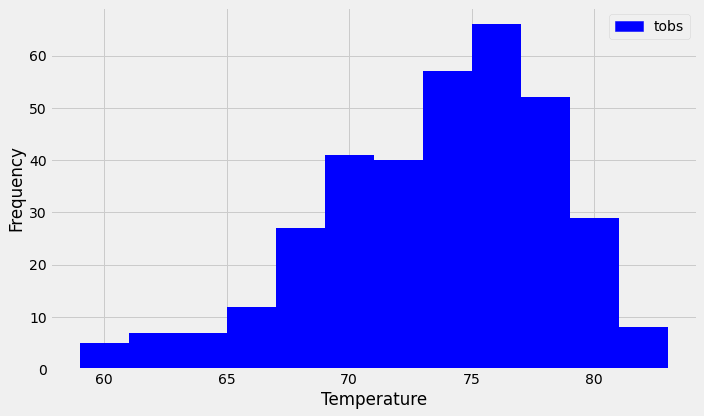

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_observation= session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station =='USC00519281').\
    filter(Measurement.date > first_date_dt).all()

temp_list = []
for temp in temp_observation:
    temp_list.append(temp[1])

plt.figure(figsize=(10,6))    
plt.hist(temp_list, color='blue', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
blue_patch = mpatches.Patch(color='blue', label='tobs')
plt.legend(handles=[blue_patch])
plt.tight_layout()
plt.show()


# Close session

In [50]:
# Close Session
session.close()